In [3]:
import sys
sys.path.append("../") # adding the path to read the utils file
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from utils import *

pd.set_option('display.max_columns', None)

In [4]:
ds = pd.read_parquet("../datasets/CICIDS-2017.parquet")
ds.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06,2.827677e+06
mean,9.884487e+00,1.480170e+07,9.369491e+00,1.040469e+01,5.498905e+02,1.618017e+04,2.078189e+02,1.873052e+01,5.826031e+01,6.898295e+01,8.717919e+02,4.109211e+01,3.062791e+02,3.356893e+02,1.491624e+06,7.078873e+04,1.299857e+06,2.922436e+06,9.192432e+06,1.625556e+05,1.449867e+07,2.613023e+06,3.270500e+06,9.052744e+06,1.023001e+06,9.904558e+06,1.807742e+06,1.487585e+06,4.689772e+06,9.683102e+05,4.634971e-02,6.294920e-05,-2.602563e+04,-2.275749e+03,6.386447e+04,7.002413e+03,1.644993e+01,9.514260e+02,1.721256e+02,2.952928e+02,4.866811e+05,3.528515e-02,4.634971e-02,2.426020e-04,2.982735e-01,3.153150e-01,9.476754e-02,6.294920e-05,2.436629e-04,6.838918e-01,1.921841e+02,5.826031e+01,3.062791e+02,9.369491e+00,5.498800e+02,1.040469e+01,1.617982e+04,6.991319e+03,1.988407e+03,5.423886e+00,-2.744690e+03,8.163975e+04,4.117872e+04,1.533486e+05,5.835903e+04,8.325054e+06,5.043903e+05,8.705181e+06,7.928619e+06
std,5.263201e+00,3.366846e+07,7.500790e+02,9.979288e+02,9.998989e+03,2.264315e+06,7.175414e+02,6.035727e+01,1.861793e+02,2.813305e+02,1.947212e+03,6.888274e+01,6.055013e+02,8.400757e+02,2.594101e+07,2.542434e+05,4.510185e+06,8.049656e+06,2.447093e+07,2.951876e+06,3.359062e+07,9.530497e+06,9.643679e+06,2.454064e+07,8.596027e+06,2.875034e+07,8.891815e+06,6.281681e+06,1.716956e+07,8.313425e+06,2.102413e-01,7.933805e-03,2.106427e+07,1.452996e+06,2.474773e+05,3.816711e+04,2.524671e+01,2.029089e+03,3.056059e+02,6.320684e+02,1.648305e+06,1.844996e-01,2.102413e-01,1.557380e-02,4.575003e-01,4.646413e-01,2.928936e-01,7.933805e-03,1.560781e-02,6.805824e-01,3.319813e+02,1.861793e+02,6.055013e+02,7.500790e+02,9.985463e+03,9.979288e+02,2.264284e+06,1.433786e+04,8.454777e+03,6.367706e+02,1.085577e+06,6.489459e+05,3.935924e+05,1.026369e+06,5.774019e+05,2.364130e+07,4.605449e+06,2.437841e+07,2.337463e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

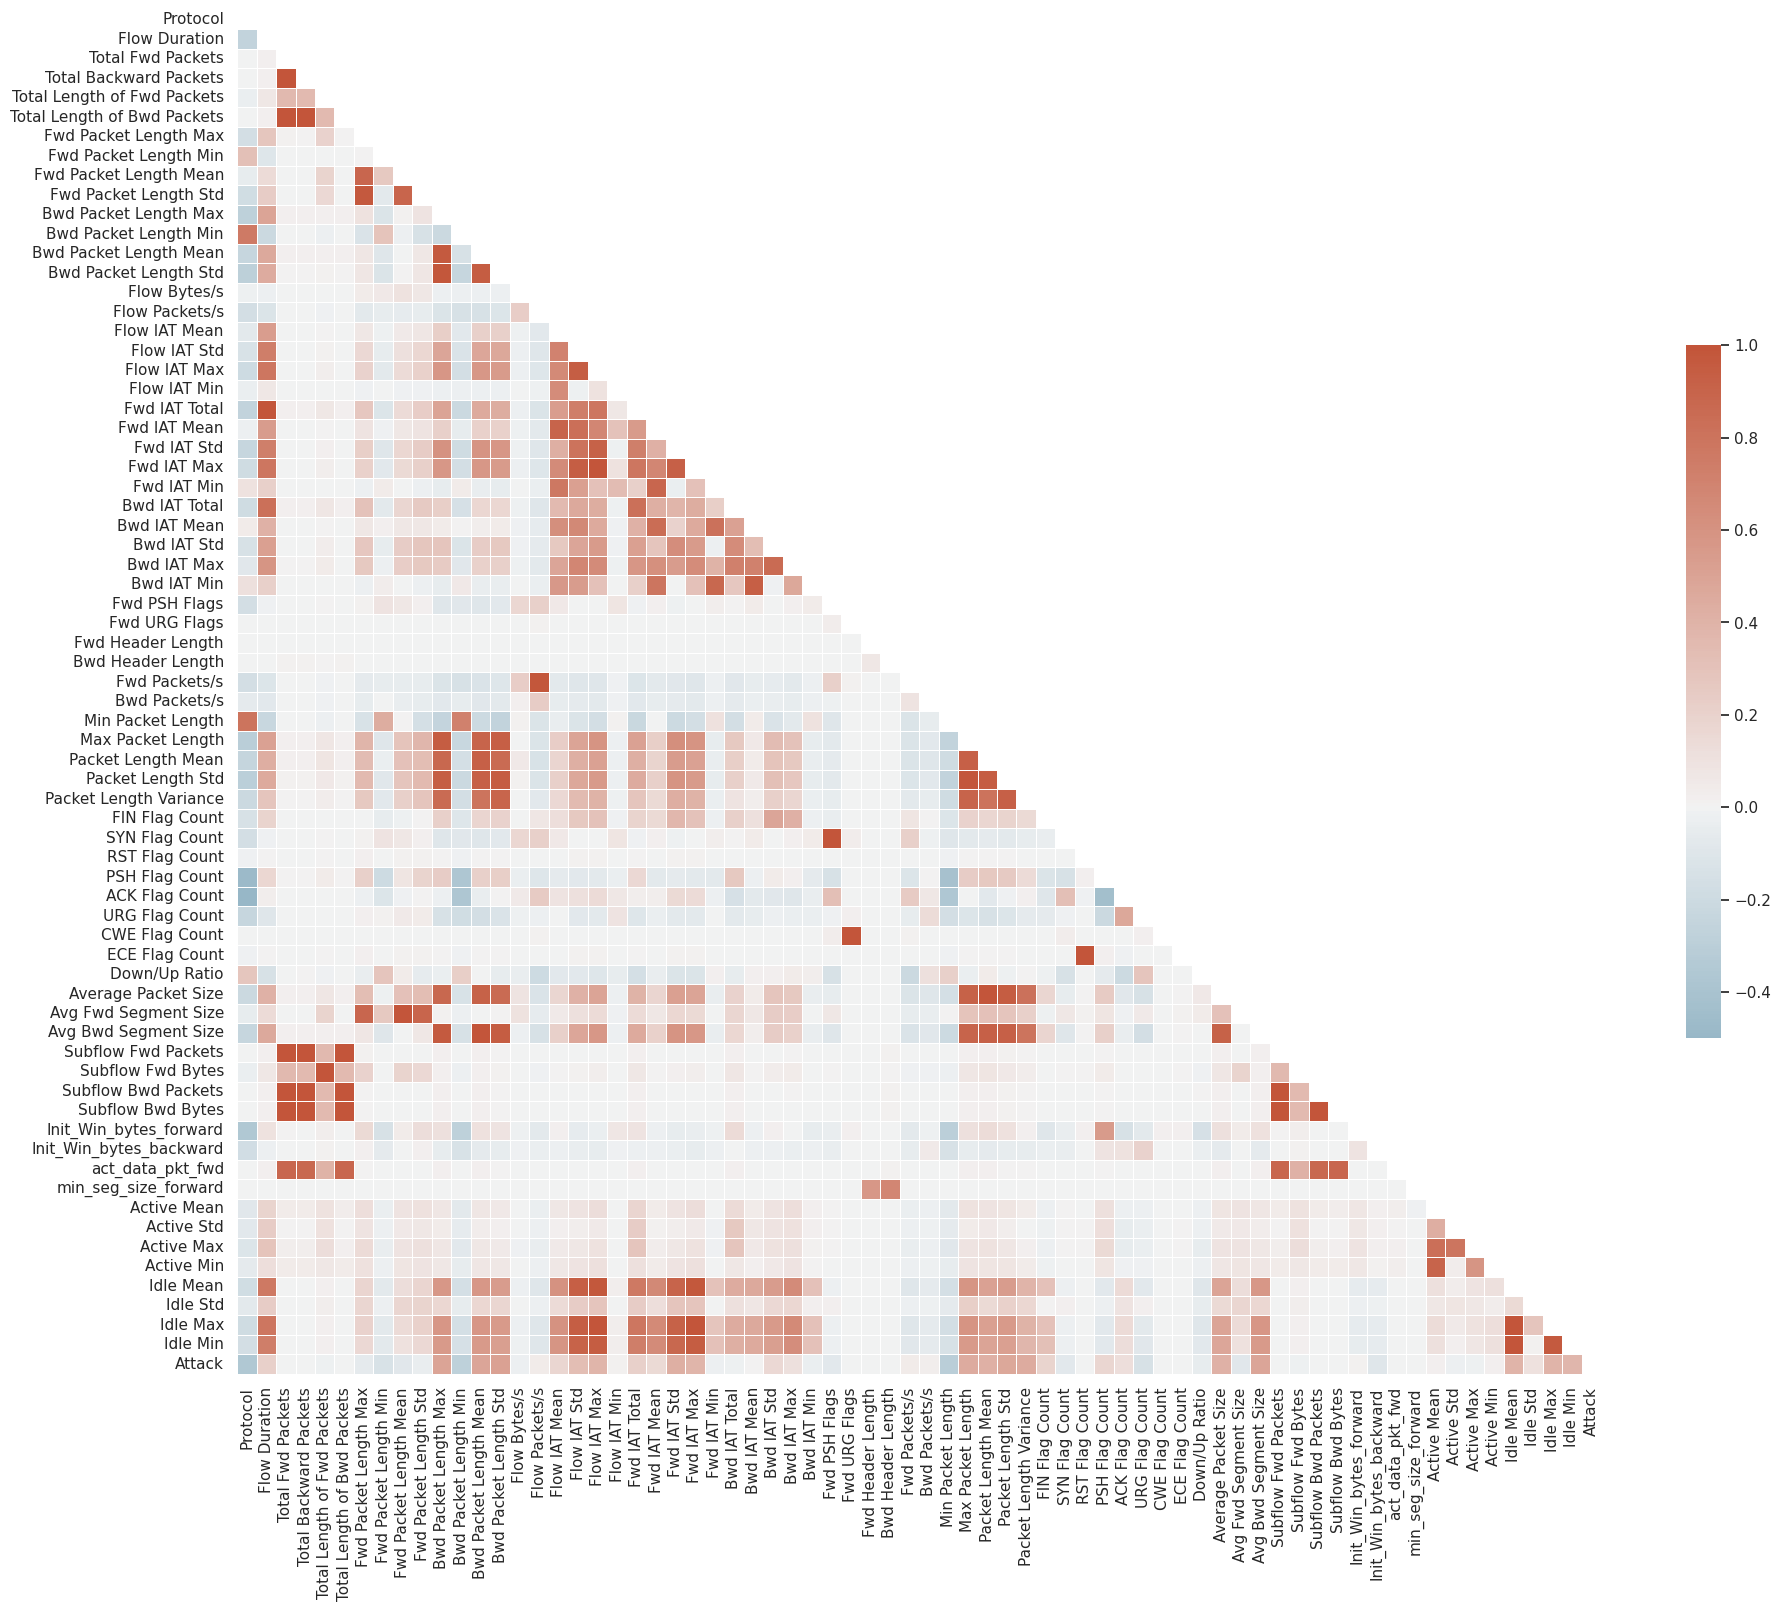

In [5]:
show_corr_matrix(ds)

In [9]:
correlation_matrix = ds.select_dtypes(include=['number','bool']).corr()

In [13]:
# Finding pairs with correlation greater than 0.9
correlation_threshold = 0.95
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            )
            correlation_pairs.append(pair)

print("Pairs with correlation over 90%:")
for pair in correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation over 90%:
Flow Duration - Fwd IAT Total: 0.9985596712817035
Total Fwd Packets - Total Backward Packets: 0.9990699519250771
Total Fwd Packets - Total Length of Bwd Packets: 0.996992805946287
Total Fwd Packets - Subflow Fwd Packets: 1.0
Total Fwd Packets - Subflow Bwd Packets: 0.9990699519250771
Total Fwd Packets - Subflow Bwd Bytes: 0.9969866625899367
Total Backward Packets - Total Length of Bwd Packets: 0.9944292900776978
Total Backward Packets - Subflow Fwd Packets: 0.9990699519250771
Total Backward Packets - Subflow Bwd Packets: 1.0
Total Backward Packets - Subflow Bwd Bytes: 0.994424112249433
Total Length of Fwd Packets - Subflow Fwd Bytes: 0.999999358056147
Total Length of Bwd Packets - Subflow Fwd Packets: 0.996992805946287
Total Length of Bwd Packets - Subflow Bwd Packets: 0.9944292900776978
Total Length of Bwd Packets - Subflow Bwd Bytes: 0.9999998601344079
Fwd Packet Length Max - Fwd Packet Length Std: 0.9684138403564041
Fwd Packet Length Mean - Avg Fwd S

In [14]:
len(correlation_pairs)

38

In [4]:
scaler = StandardScaler()
scaled_ds = scaler.fit_transform(ds.select_dtypes(include=np.number))

In [5]:
pca = PCA(n_components=2)
pca.fit(scaled_ds)

PCA(n_components=2)

In [6]:
pd.unique(ds['Label'])

array(['BENIGN', 'PortScan', 'Infiltration', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [7]:
brute_force_index =  (ds['Label'] == 'FTP-Patator') | (ds['Label'] == 'SSH-Patator')
brute_force = scaled_ds[brute_force_index]

['FTP-Patator' 'SSH-Patator']


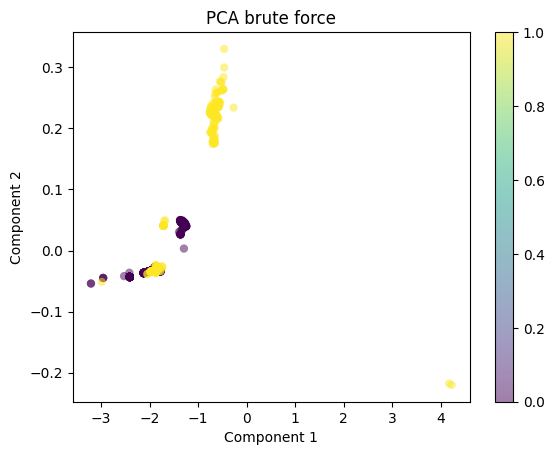

In [57]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[brute_force_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(brute_force)

print(label_encoder.inverse_transform([0,1]))

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA brute force")
plt.colorbar();

In [9]:
web_attack_index = (ds['Label'] == 'Web Attack  Brute Force') | (ds['Label'] == 'Web Attack  XSS') | (ds['Label'] == 'Web Attack  Sql Injection')
web_attack = scaled_ds[web_attack_index]

['Web Attack  Brute Force' 'Web Attack  Sql Injection' 'Web Attack  XSS']


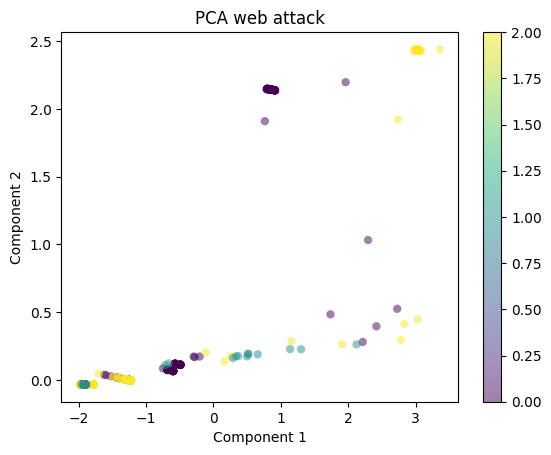

In [58]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[web_attack_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(web_attack)

print(label_encoder.inverse_transform([0,1,2]))


# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA web attack")
plt.colorbar();

In [11]:
pd.unique(ds['Label'])

array(['BENIGN', 'PortScan', 'Infiltration', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [12]:
dos_attack_index = (ds['Label'] == 'DDoS') | (ds['Label'] == 'DoS slowloris') | (ds['Label'] == 'DoS Slowhttptest') | (ds['Label'] == 'DoS Hulk') | (ds['Label'] == 'DoS GoldenEye') | (ds['Label'] == 'Heartbleed')
dos_attack = scaled_ds[dos_attack_index]

['DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris'
 'Heartbleed']


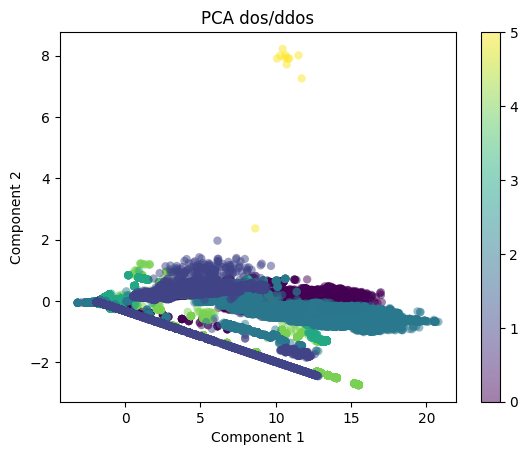

In [53]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[dos_attack_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(dos_attack)

print(label_encoder.inverse_transform([0,1,2,3,4,5]))

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA dos/ddos")
plt.colorbar();

In [17]:
#tsne = TSNE(n_components=2, perplexity=50, verbose=1)
#tsne.fit(scaled_ds)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2827677 samples in 1.361s...


In [37]:
attacks = pd.unique(ds['Label']).tolist()
distances = []
attack_names = []

for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            distances.append(distance.euclidean(scaled_ds[ds['Label'] == attack1].mean(0), scaled_ds[ds['Label'] == attack2].mean(0)))
            attack_names.append(attack1 + " - " + attack2)
    attacks.pop(0)

attacks_distances = pd.DataFrame({'attack': attack_names, 'distance': distances})

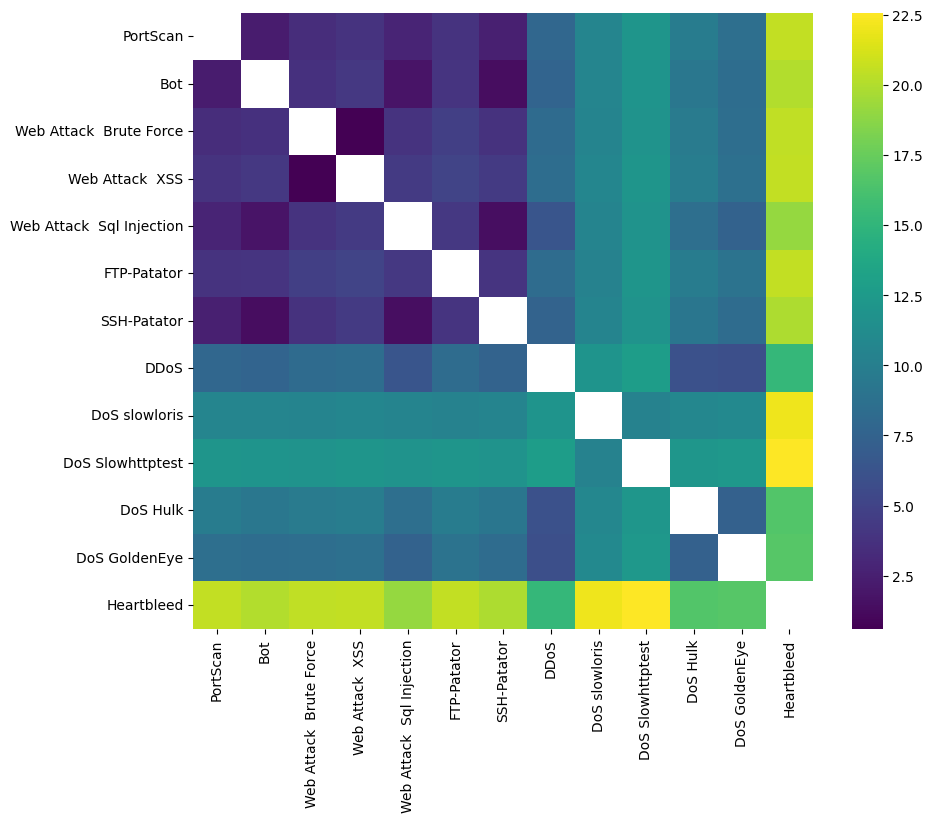

In [49]:
attacks = ['PortScan', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

# Creare un DataFrame vuoto con gli attacchi come indici e colonne
heatmap_data = pd.DataFrame(np.nan, index=attacks, columns=attacks)

# Riempire il DataFrame con le distanze euclidee
for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            mean1 = scaled_ds[ds['Label'] == attack1].mean(0)
            mean2 = scaled_ds[ds['Label'] == attack2].mean(0)
            heatmap_data.loc[attack1, attack2] = distance.euclidean(mean1, mean2)

# Creare la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), cmap='viridis')
plt.show()

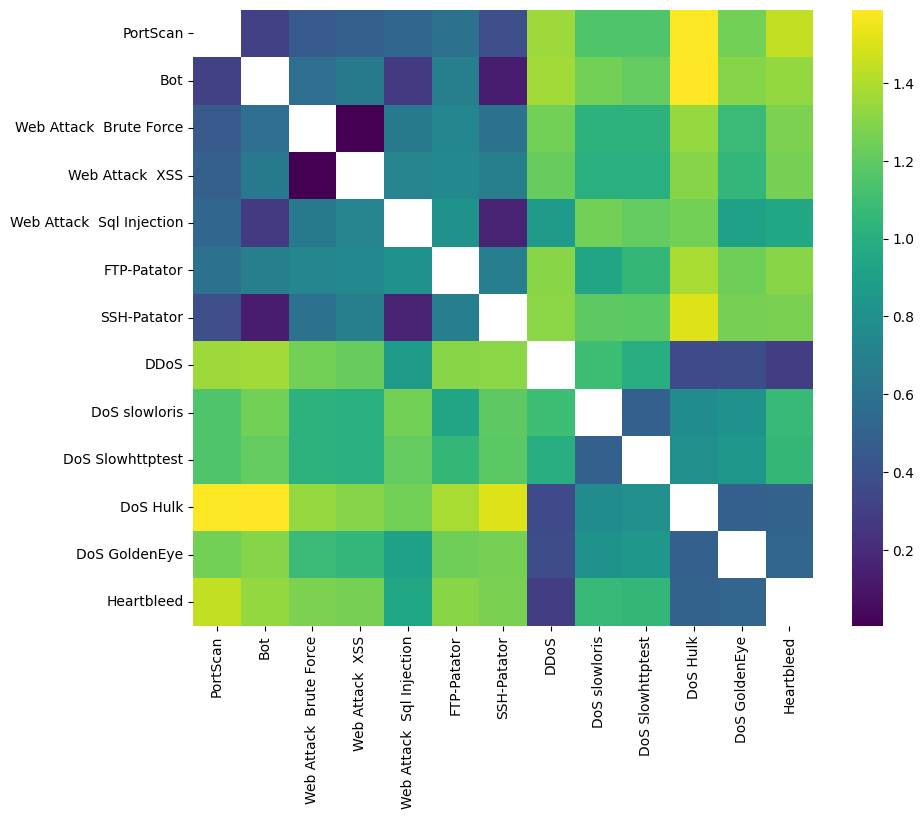

In [50]:
attacks = ['PortScan', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

# Creare un DataFrame vuoto con gli attacchi come indici e colonne
heatmap_data = pd.DataFrame(np.nan, index=attacks, columns=attacks)

# Riempire il DataFrame con le distanze euclidee
for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            mean1 = scaled_ds[ds['Label'] == attack1].mean(0)
            mean2 = scaled_ds[ds['Label'] == attack2].mean(0)
            heatmap_data.loc[attack1, attack2] = distance.cosine(mean1, mean2)

# Creare la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), cmap='viridis')
plt.show()

In [39]:
attacks_distances.sort_values(by=['distance'], ascending=False)

,attack,distance
26,Infiltration - Heartbleed,55.949285
25,Infiltration - DoS GoldenEye,55.149287
21,Infiltration - DDoS,55.135594
14,Infiltration - PortScan,55.025056
24,Infiltration - DoS Hulk,55.005330
...,...,...
2,BENIGN - Bot,2.245191
39,Web Attack Sql Injection - Bot,1.798014
52,SSH-Patator - Web Attack Sql Injection,1.403928
43,Web Attack Sql Injection - SSH-Patator,1.403928


In [41]:
attacks_distances.sort_values(by=['distance'], ascending=False).to_csv('attacks_distances.csv', index=False)